In [17]:
from dataloader import get_loader
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt



In [3]:
# Load in data
# root = '/Volumes/Datasets/inner_speech/derivatives/'
root =  'dataset/derivatives/' # -sil
creater = get_loader(root)
xn, yn = creater.load_multiple_subjects([1, 2, 3, 4, 5, 6, 7])
xt, yt = creater.load_single_subject(8)

# LDA

In [4]:
# Vectorize data so that X is of size = (n_samples, n_features)
train_x = xn.reshape(xn.shape[0], xn.shape[1]*xn.shape[2])
test_x = xt.reshape(xt.shape[0], xt.shape[1]*xt.shape[2])
print("train_x: ", train_x.shape)
print("test_x: ", test_x.shape)


# Get Labels
train_y = yn[:,1]
test_y = yt[:,1]
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_x:  (1080, 147584)
test_x:  (160, 147584)
train_y:  (1080,)
test_y:  (160,)


In [7]:
# Fit LDA
# solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None
clf = LinearDiscriminantAnalysis()
train_x_proj = clf.fit_transform(train_x, train_y)



In [8]:
# Predict on test data
predictions = clf.predict(test_x)
accuracy = clf.score(test_x, test_y) 
print("Accuracy: ", accuracy*100)

Accuracy:  29.375


In [19]:
# Tranform data to LDA space
test_x_proj = clf.transform(test_x)
test_x_proj.shape
test_y

array([0, 2, 0, 3, 0, 1, 1, 1, 2, 2, 1, 2, 1, 3, 0, 2, 0, 1, 1, 0, 1, 3,
       2, 0, 2, 0, 2, 1, 3, 3, 3, 0, 0, 3, 3, 1, 2, 2, 3, 3, 1, 0, 2, 3,
       2, 3, 0, 0, 3, 2, 3, 0, 2, 0, 3, 1, 3, 1, 0, 0, 3, 0, 0, 1, 1, 2,
       1, 1, 0, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 3, 0, 2, 3, 0, 3, 3, 3, 3,
       0, 0, 0, 1, 3, 2, 3, 2, 3, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 1, 2, 2, 3, 1, 1, 2, 3, 0, 2, 3, 1, 3, 1, 1, 1, 0, 1, 2, 3, 0,
       3, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 3, 3, 0, 0, 1, 3, 0,
       0, 3, 2, 3, 1, 3])

(-2.0, 2.0)

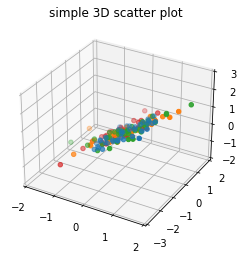

In [75]:
# Visualize data in LDA Space

ax = plt.axes(projection ="3d")
for i in range(4):
    data = test_x_proj[test_y == i, :]
    ax.scatter3D(data[:,0], data[:,1], data[:,0], label=i)
plt.title("simple 3D scatter plot")
#ax.view_init(30,45)
ax.set_zlim([-2,3])
ax.set_ylim([-3,2])
ax.set_xlim([-2,2]) # there are some outliers which make it hard to see the giant clump unless you set axis limits
# But the projected data isnt very easily separable anyways


## Classify with SVM

In [115]:
from sklearn import svm
# The learning is very fast
svm_clf = svm.SVC(C=.1, kernel="poly", degree=2) # best run
# svm_clf = svm.SVC(C=1, kernel="linear")
svm_clf.fit(train_x_proj, train_y)
svm_clf.score(test_x_proj, test_y)

0.3125